In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



In [11]:
from sklearn import datasets
digits = datasets.load_digits()


In [29]:
bayes = [GaussianNB,MultinomialNB,BernoulliNB]
def classify_and_predict(data,target,target_names):
    for b in bayes:
        if b == BernoulliNB:
            cls = b(binarize=data.mean(0))
        else:
            cls = b()
        cls.fit(data,target)
        cfs = confusion_matrix(target,cls.predict(data))
        # Plot normalized confusion matrix
        plt.figure(figsize=(15,15))
        plot_confusion_matrix(cfs, classes=target_names, normalize=True, title='Normalized confusion matrix')
        plt.show()
        print(b.__name__)
        print(cfs)
        print()

load_breast_cancer
Normalized confusion matrix
[[0.89 0.11]
 [0.03 0.97]]


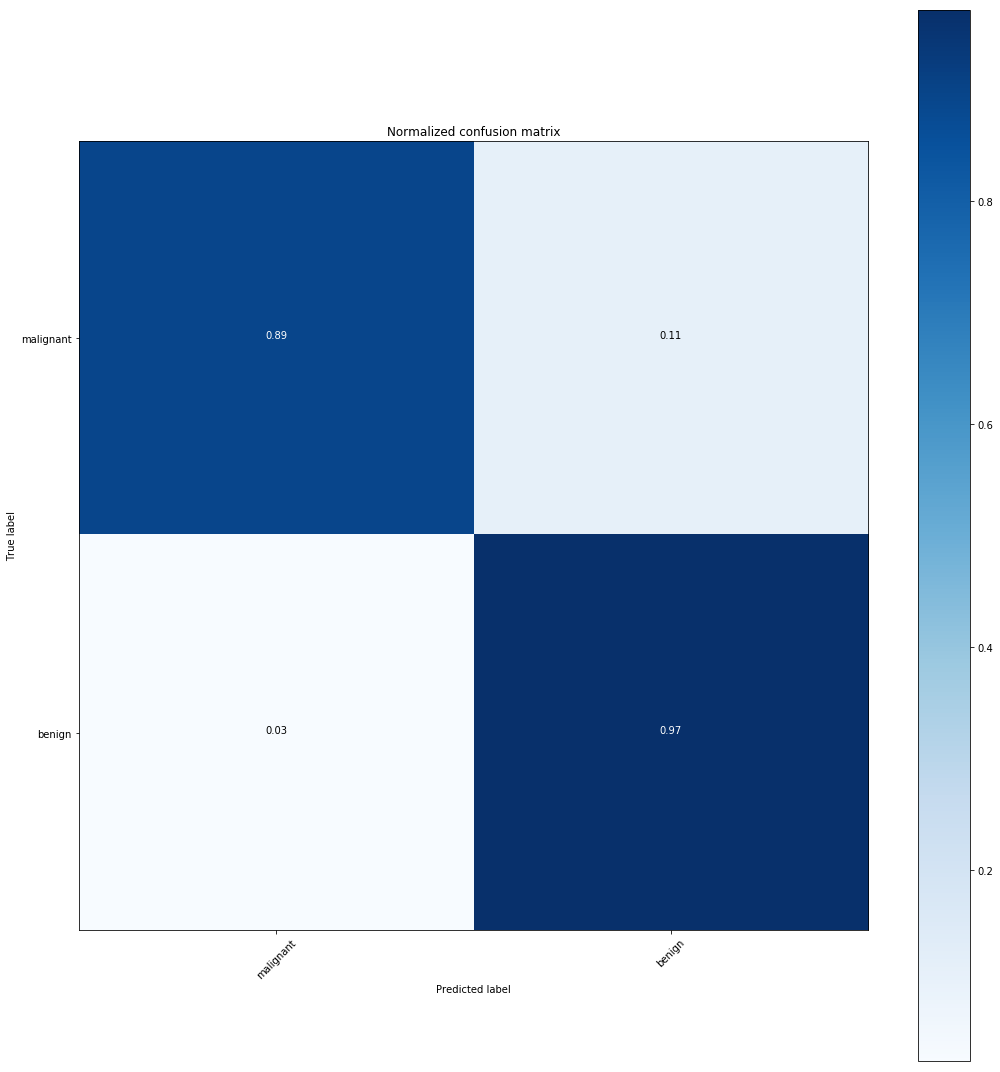

GaussianNB
[[189  23]
 [ 10 347]]

Normalized confusion matrix
[[0.77 0.23]
 [0.03 0.97]]


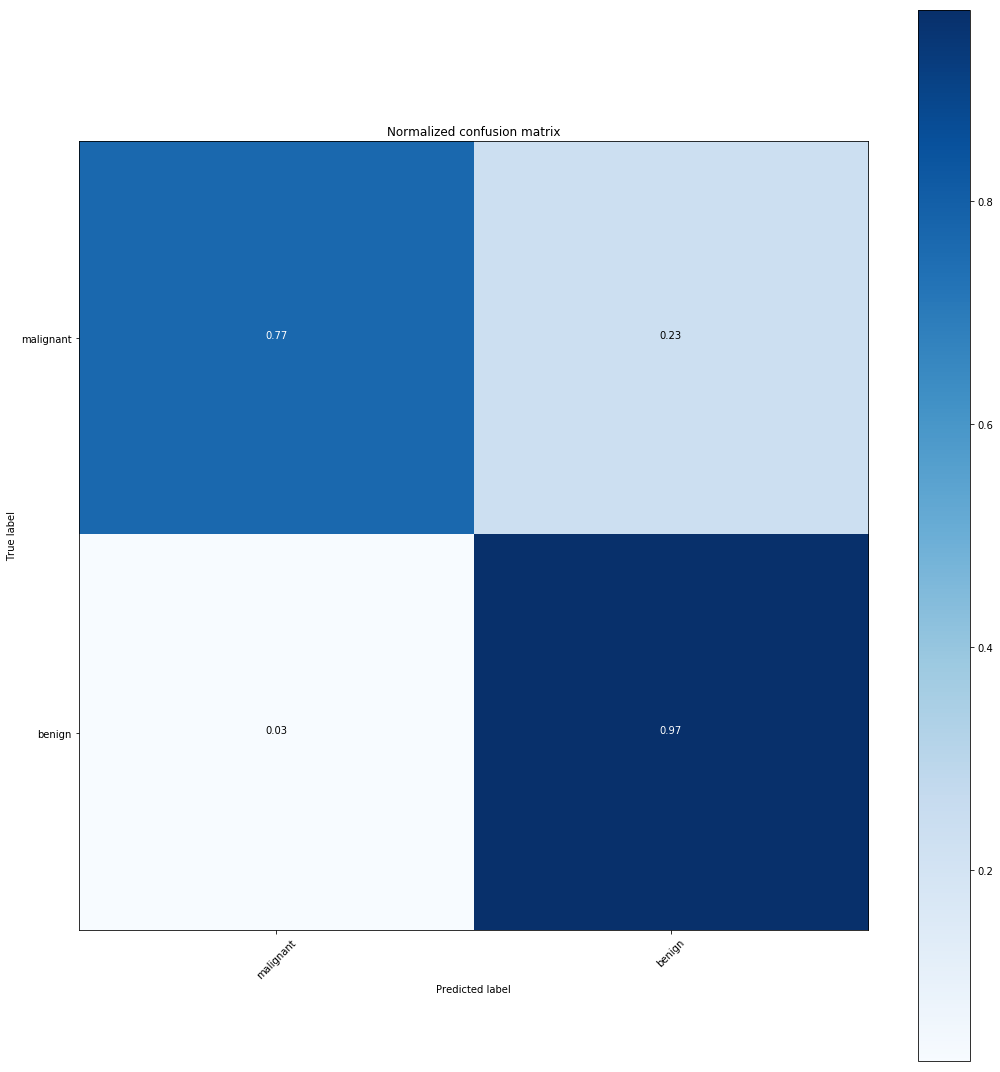

MultinomialNB
[[163  49]
 [ 10 347]]

Normalized confusion matrix
[[0.93 0.07]
 [0.06 0.94]]


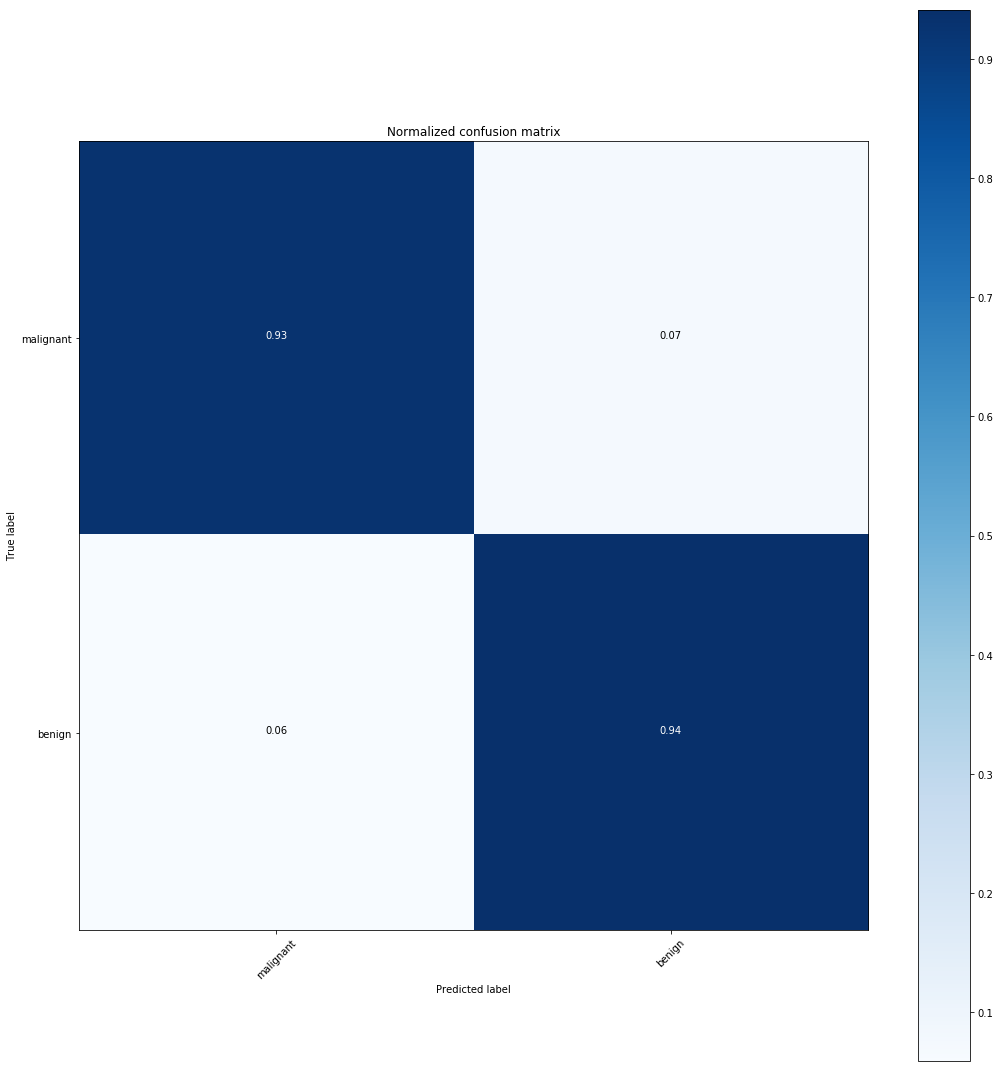

BernoulliNB
[[197  15]
 [ 21 336]]

load_digits
Normalized confusion matrix
[[0.99 0.   0.   0.   0.01 0.   0.   0.01 0.   0.  ]
 [0.   0.85 0.   0.   0.   0.   0.02 0.03 0.08 0.03]
 [0.   0.07 0.64 0.   0.   0.01 0.01 0.   0.28 0.  ]
 [0.   0.01 0.01 0.79 0.   0.03 0.   0.04 0.11 0.01]
 [0.01 0.01 0.   0.   0.84 0.01 0.01 0.12 0.02 0.  ]
 [0.   0.   0.   0.02 0.   0.93 0.01 0.03 0.01 0.01]
 [0.   0.01 0.   0.   0.   0.01 0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.01 0.01 0.   0.99 0.   0.  ]
 [0.   0.05 0.   0.01 0.   0.02 0.   0.07 0.86 0.  ]
 [0.01 0.03 0.   0.03 0.01 0.02 0.   0.09 0.11 0.71]]


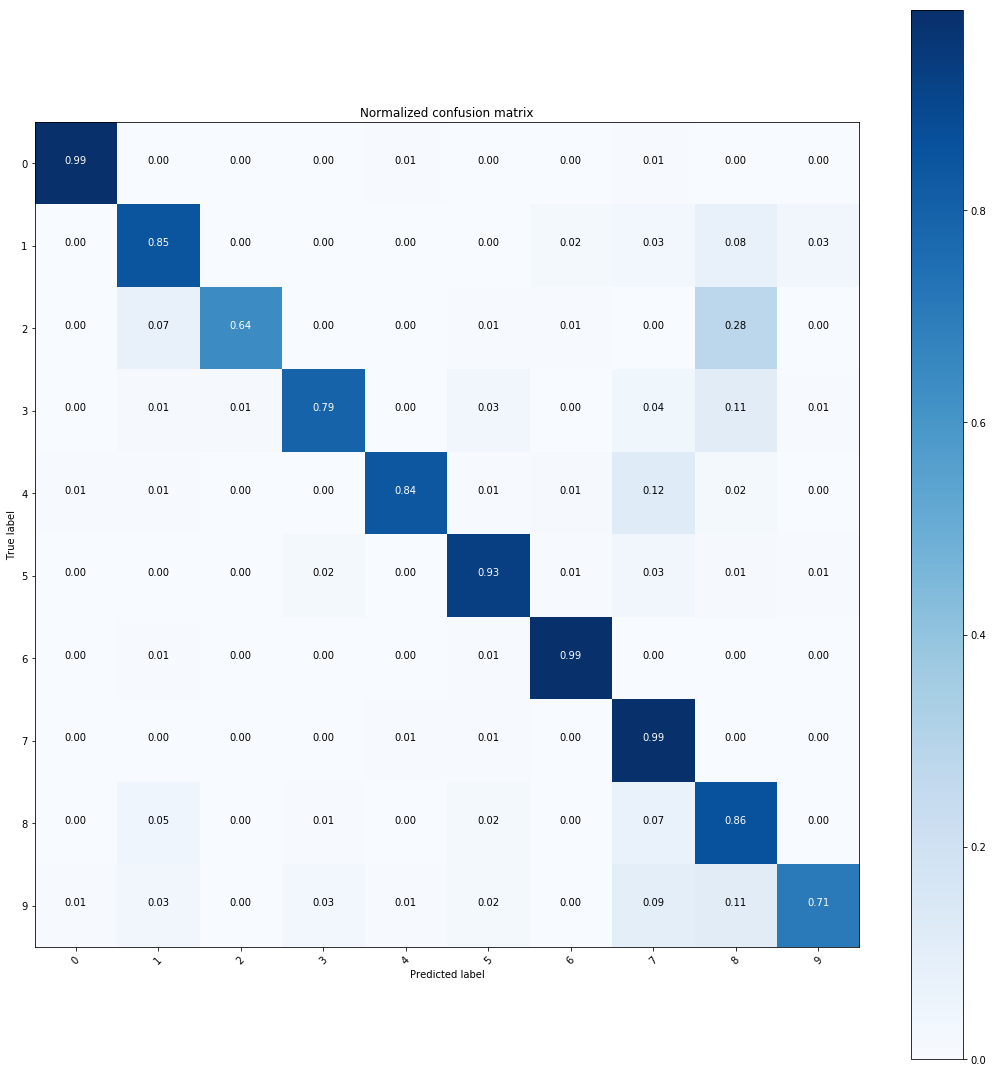

GaussianNB
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]

Normalized confusion matrix
[[0.98 0.   0.   0.   0.02 0.   0.   0.   0.   0.  ]
 [0.   0.75 0.08 0.   0.   0.01 0.01 0.   0.07 0.08]
 [0.   0.04 0.9  0.   0.   0.   0.   0.   0.05 0.01]
 [0.   0.   0.01 0.87 0.   0.01 0.   0.03 0.04 0.04]
 [0.01 0.   0.   0.   0.96 0.   0.   0.02 0.02 0.  ]
 [0.   0.   0.   0.   0.01 0.86 0.01 0.01 0.01 0.11]
 [0.   0.01 0.   0.   0.01 0.01 0.97 0.   0.01 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.99 0.01 0.  ]
 [0.   0.06 0.01 0.   0.01 0.   0.01 0.01 0.89 0.03]
 [0.   0.01 0.   0.01 0.01 0.01 0.   0.06 0.04 0.88]

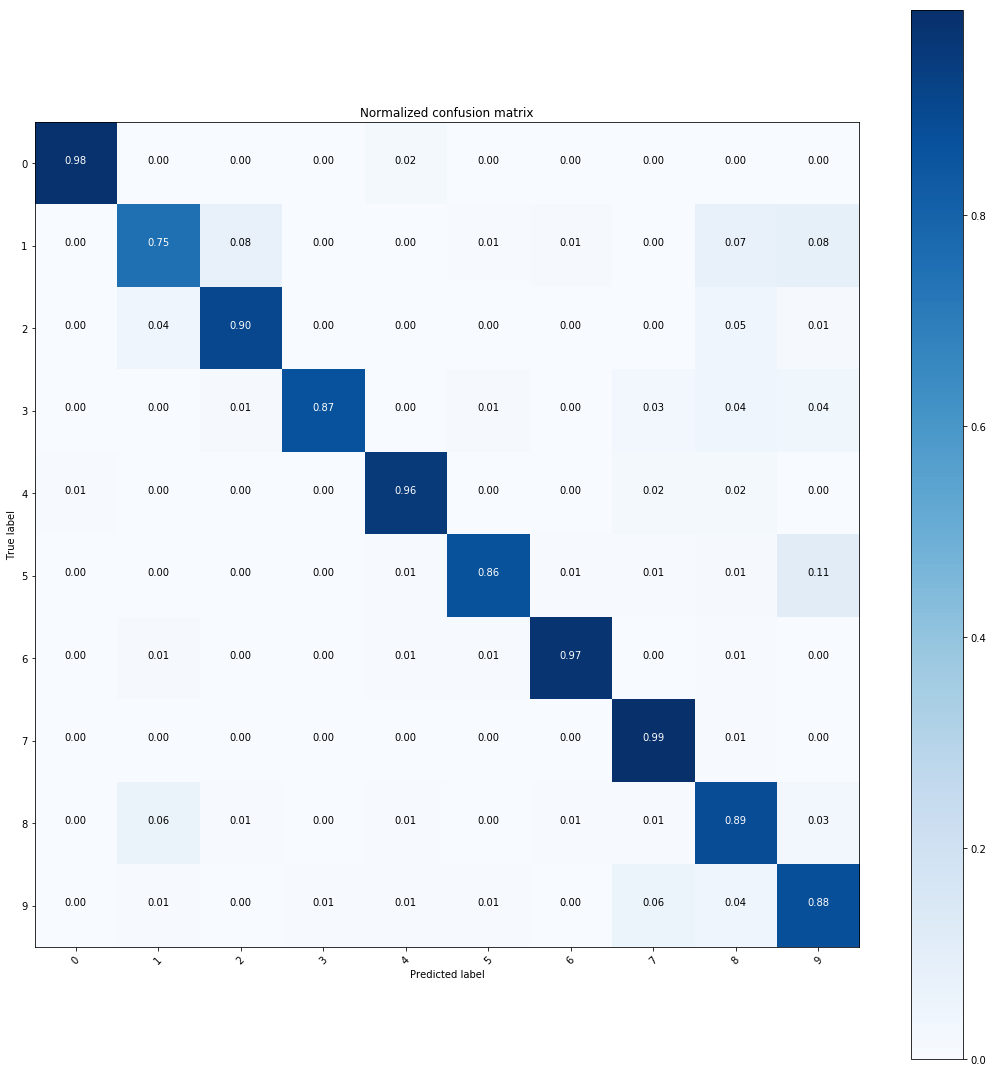

MultinomialNB
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]

Normalized confusion matrix
[[0.97 0.01 0.   0.   0.02 0.01 0.01 0.   0.   0.  ]
 [0.   0.8  0.05 0.   0.01 0.01 0.01 0.01 0.05 0.07]
 [0.   0.03 0.9  0.01 0.   0.   0.   0.01 0.05 0.01]
 [0.01 0.01 0.02 0.84 0.   0.02 0.   0.04 0.04 0.03]
 [0.   0.02 0.   0.   0.94 0.   0.   0.03 0.01 0.  ]
 [0.   0.01 0.   0.   0.01 0.88 0.01 0.   0.01 0.08]
 [0.01 0.02 0.   0.   0.01 0.   0.97 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.98 0.02 0.01]
 [0.   0.1  0.01 0.02 0.   0.02 0.   0.01 0.81 0.03]
 [0.   0.02 0.   0.02 0.01 0.01 0.   0.04 0.03 0.

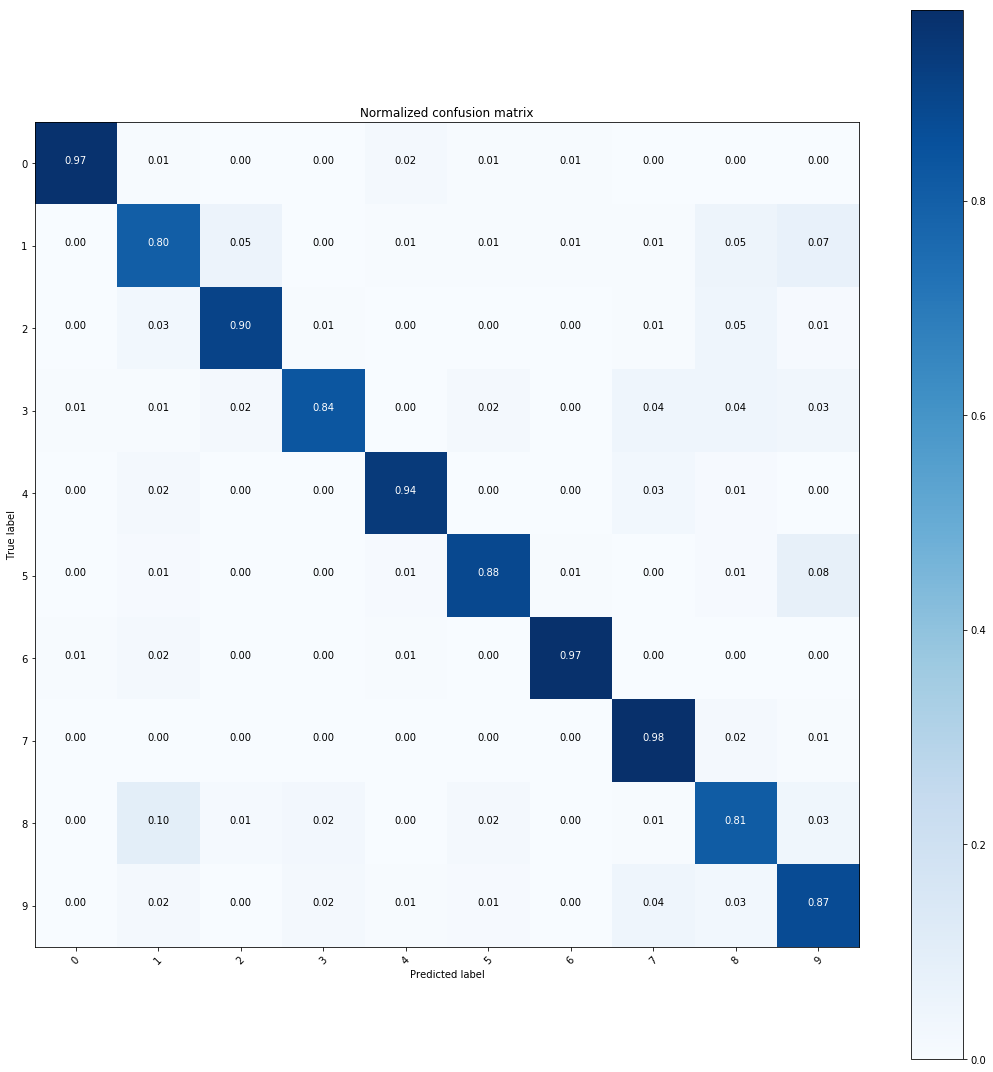

BernoulliNB
[[172   1   0   0   3   1   1   0   0   0]
 [  0 146  10   0   1   1   1   1   9  13]
 [  0   5 160   1   0   0   0   1   8   2]
 [  1   1   3 153   0   3   0   8   8   6]
 [  0   4   0   0 170   0   0   5   2   0]
 [  0   2   0   0   2 161   1   0   2  14]
 [  1   3   0   0   1   0 176   0   0   0]
 [  0   0   0   0   0   0   0 175   3   1]
 [  0  17   2   4   0   3   0   1 141   6]
 [  0   3   0   4   1   2   0   8   5 157]]

load_iris
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.94 0.06]
 [0.   0.06 0.94]]


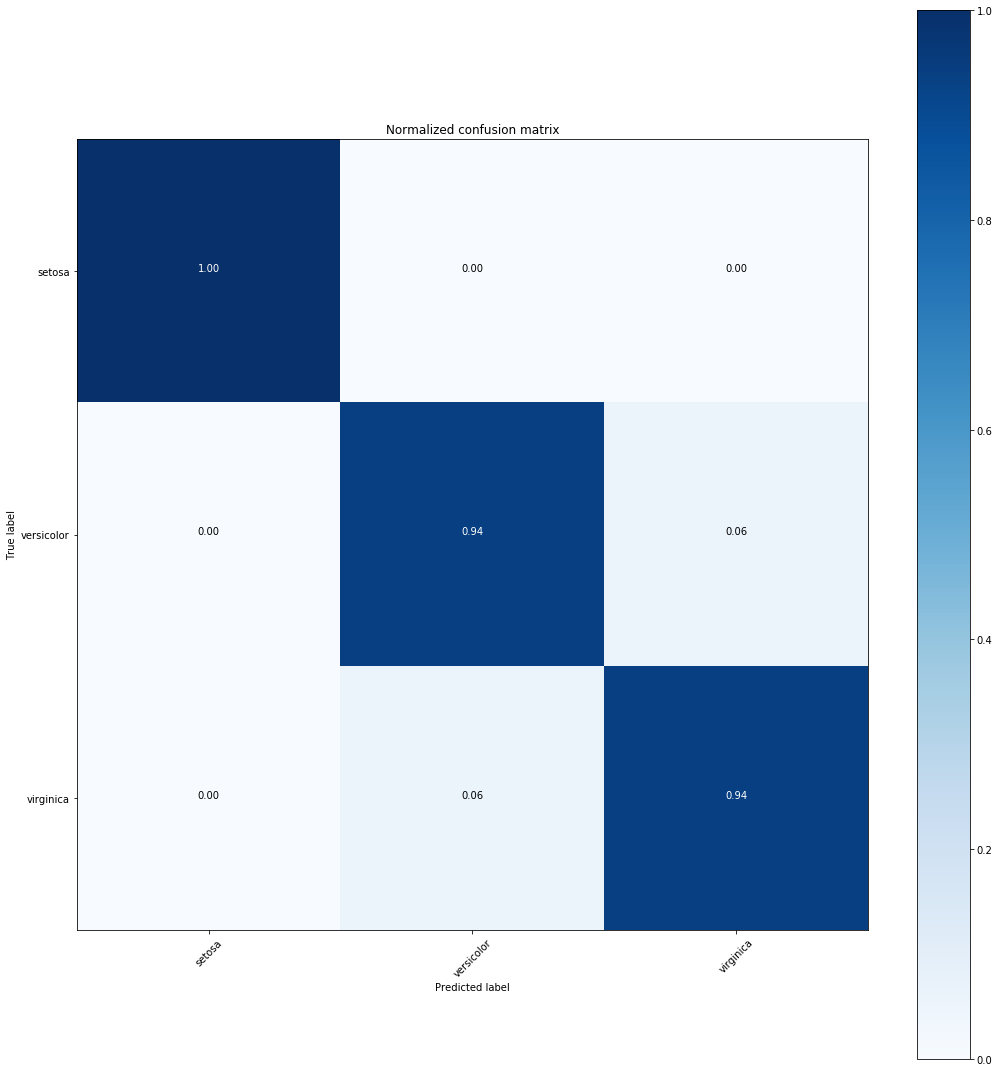

GaussianNB
[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.92 0.08]
 [0.   0.06 0.94]]


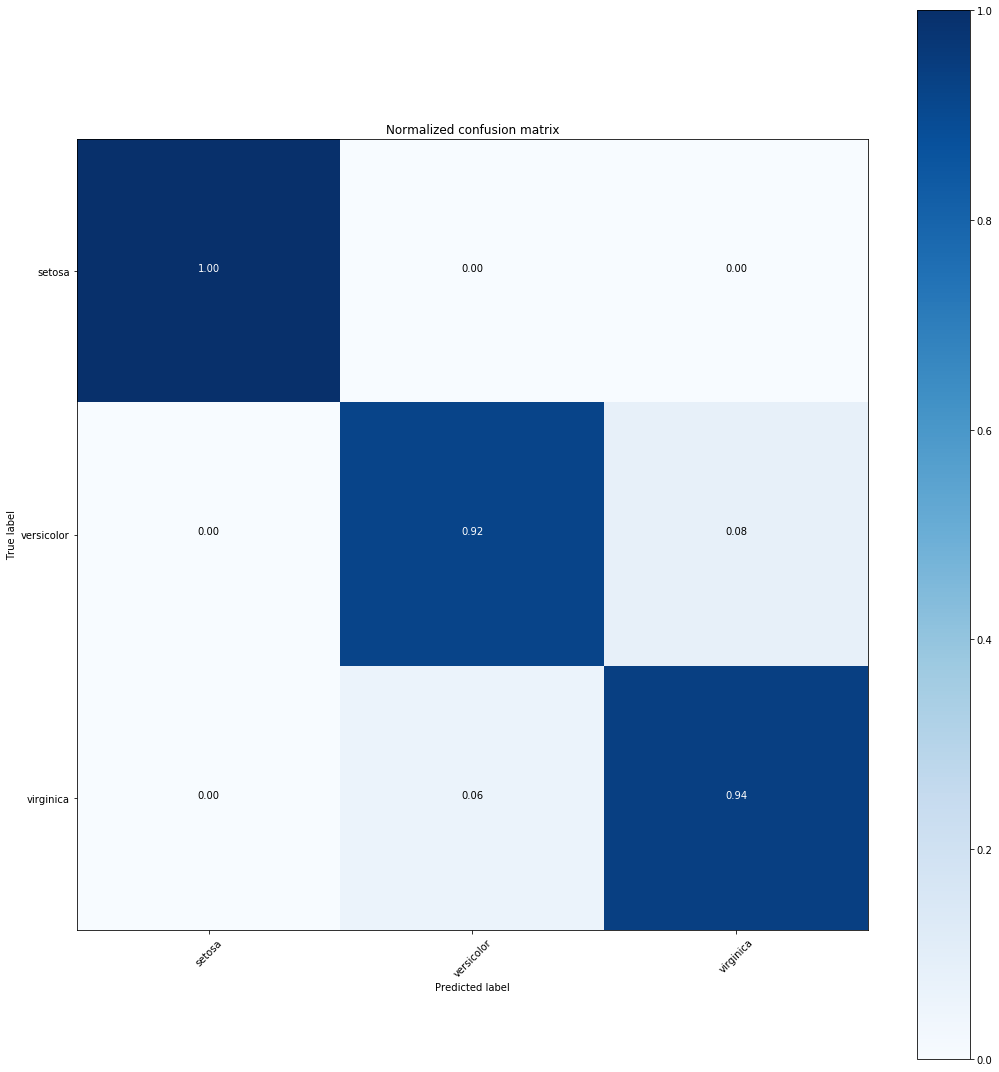

MultinomialNB
[[50  0  0]
 [ 0 46  4]
 [ 0  3 47]]

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.12 0.38 0.5 ]
 [0.   0.12 0.88]]


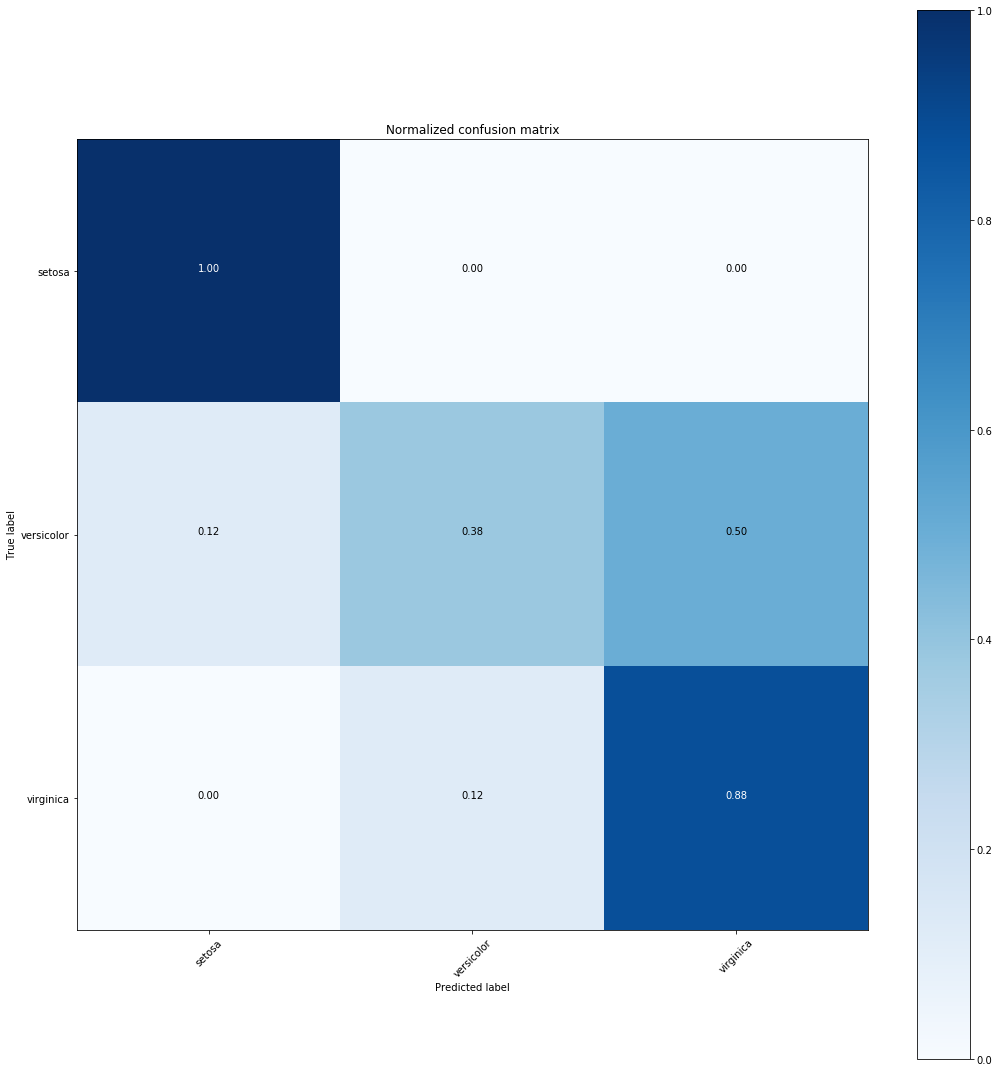

BernoulliNB
[[50  0  0]
 [ 6 19 25]
 [ 0  6 44]]

load_wine
Normalized confusion matrix
[[0.98 0.02 0.  ]
 [0.   0.99 0.01]
 [0.   0.   1.  ]]


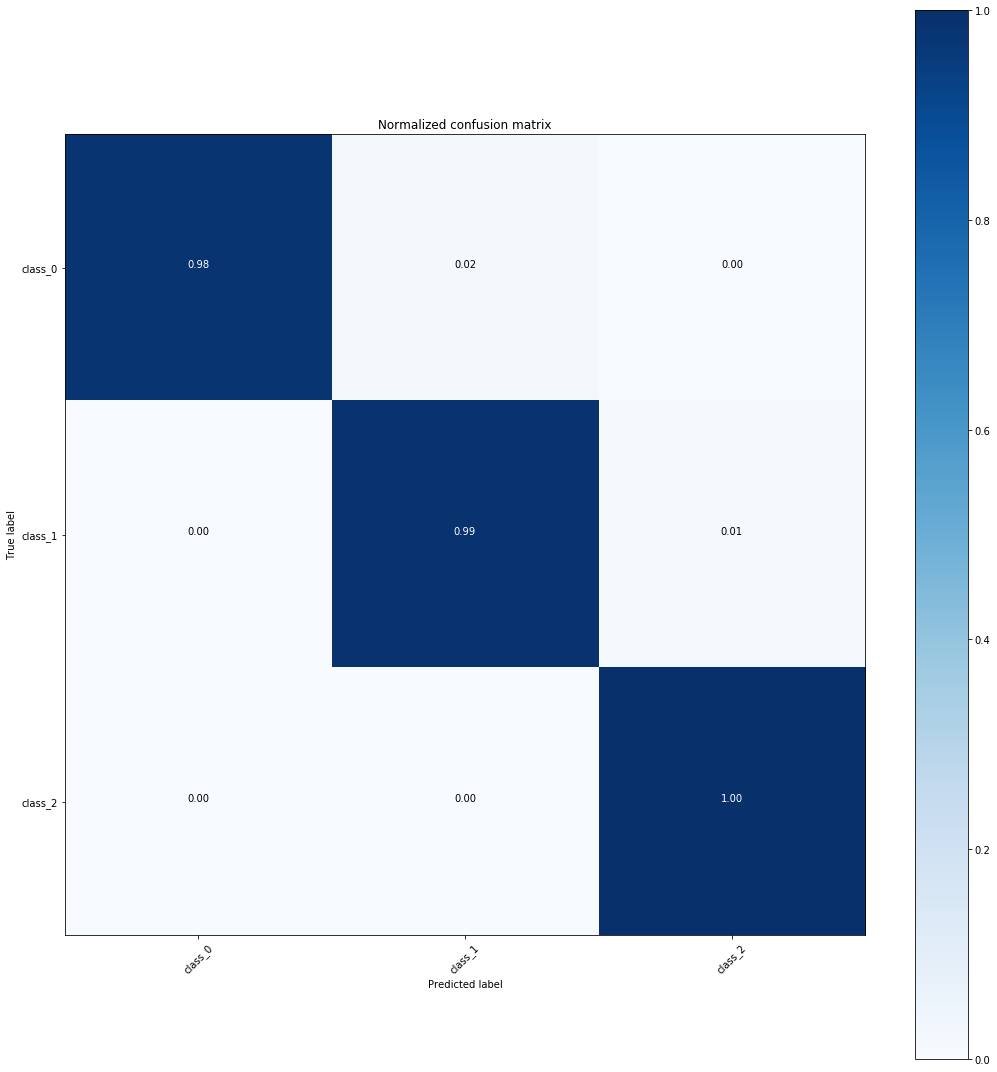

GaussianNB
[[58  1  0]
 [ 0 70  1]
 [ 0  0 48]]

Normalized confusion matrix
[[0.88 0.08 0.03]
 [0.04 0.86 0.1 ]
 [0.02 0.1  0.88]]


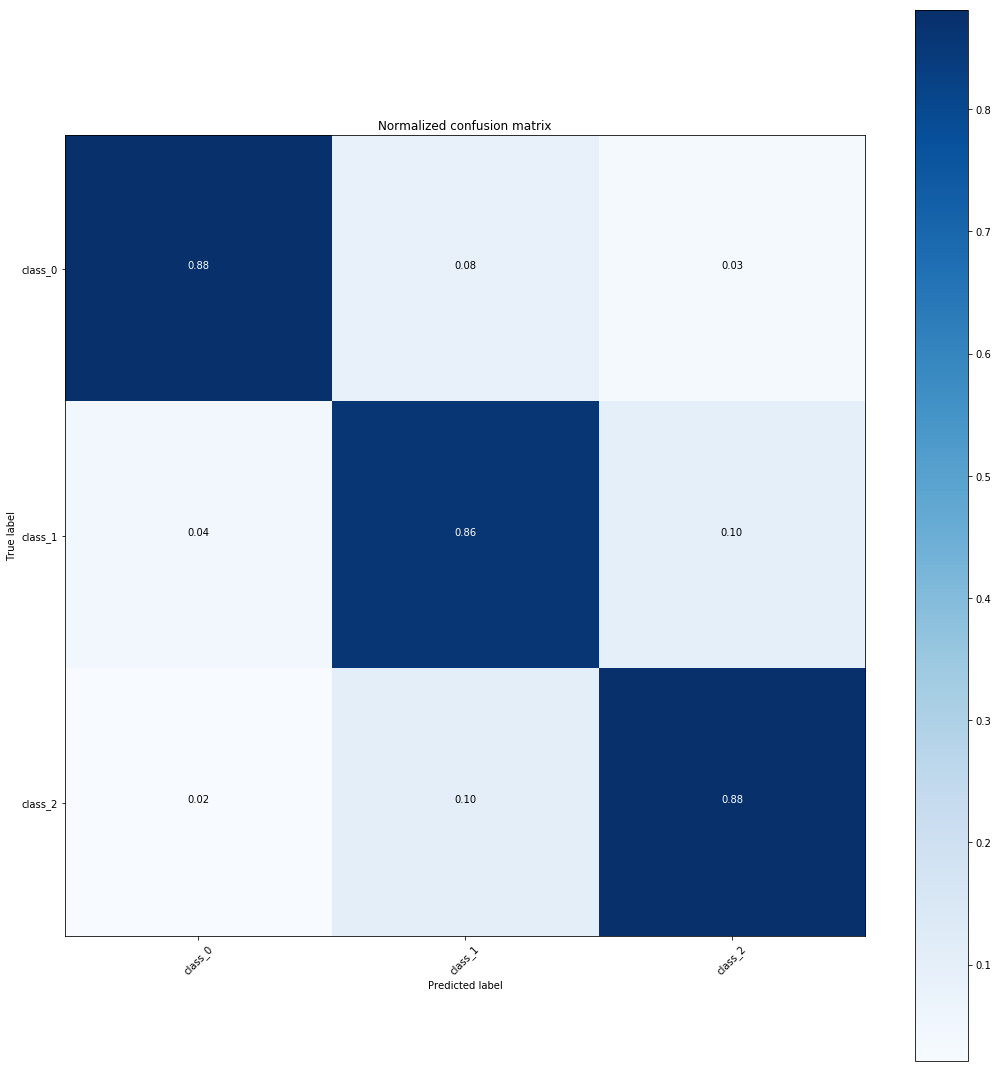

MultinomialNB
[[52  5  2]
 [ 3 61  7]
 [ 1  5 42]]

Normalized confusion matrix
[[0.98 0.02 0.  ]
 [0.06 0.87 0.07]
 [0.   0.02 0.98]]


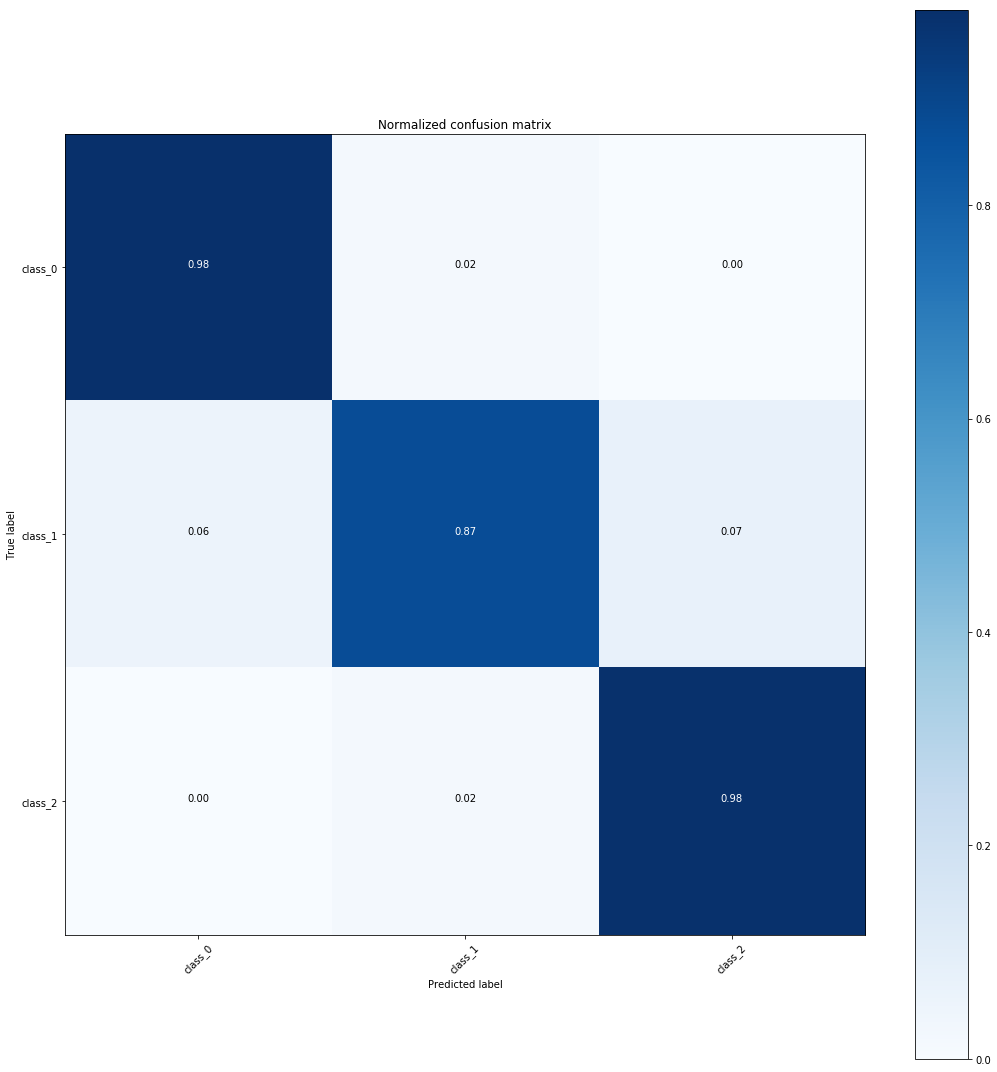

BernoulliNB
[[58  1  0]
 [ 4 62  5]
 [ 0  1 47]]



In [31]:


for x in dir(datasets):
    if x in ['load_digits', 'load_iris', 'load_wine', 'load_breast_cancer']:
        print(x)
        dta = getattr(datasets,x)()
        #print(x)#print(dta.data)#print(dta.DESCR)
        classify_and_predict(dta.data,dta.target,dta.target_names)